# CheXScan ResNet-18 Model

## Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader

from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from PIL import Image

## Run this code if you're using Colab

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

## Transform functions for data augmentation and normalization

You can further adjust these parameters if needed to achieve the desired balance between augmentation and maintaining image quality.

In [3]:
train_transform = transforms.Compose([   
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.03, hue=0.03),  # Adjust saturation and hue
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

## Dataset Summary

In [5]:
# Define class names
class_names = ['Normal', 'Pneumonia', 'Tuberculosis'] 

In [6]:
data_dir = r"E:/chexscan/data"
train_data_dir = os.path.join(data_dir, 'train_data')
test_data_dir = os.path.join(data_dir, 'test_data')

In [7]:
def count_images_in_subdirectories(directory):
    subdirectories = os.listdir(directory)
    counts = {}
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        count = sum(len(files) for _, _, files in os.walk(subdir_path))
        counts[subdir] = count
    return counts

In [8]:
train_counts = count_images_in_subdirectories(train_data_dir)
test_counts = count_images_in_subdirectories(test_data_dir)

print("Number of images in each subdirectory of training data:")
for subdir, count in train_counts.items():
    print(f"{subdir}: {count}")

print("\nNumber of images in each subdirectory of testing data:")
for subdir, count in test_counts.items():
    print(f"{subdir}: {count}")

Number of images in each subdirectory of training data:
Normal: 800
Pneumonia: 800
Tuberculosis: 800

Number of images in each subdirectory of testing data:
Normal: 200
Pneumonia: 200
Tuberculosis: 200


## Define datasets (Online)

In [9]:
# data_dir = '/content/drive/My Drive/THESIS/Datasets/Mary/'
# train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
# test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

## Define datasets (Local)

In [10]:
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train_data'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test_data'), transform=test_transform)

## Define data loaders

In [11]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

## Visualizes training data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

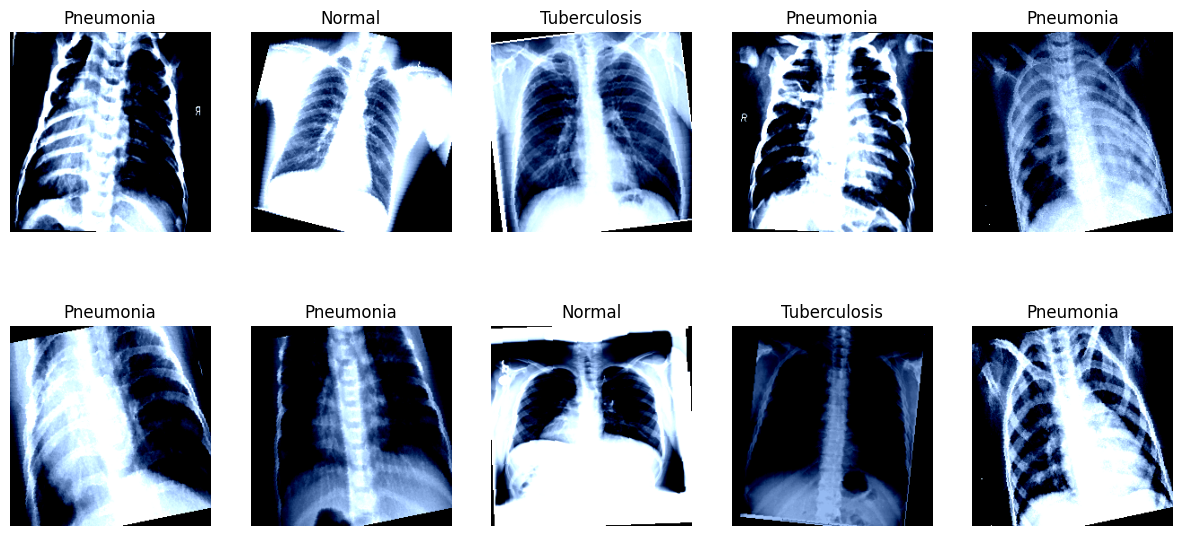

In [12]:
def visualize_training_data(loader):
    
    """
    Visualizes a batch of training images along with their corresponding labels.

    Parameters:
        loader (DataLoader): DataLoader containing the training dataset.

    Returns:
        None
    """
    
    classes = loader.dataset.classes
    class_names = {i: classes[i] for i in range(len(classes))}
    images, labels = next(iter(loader))
    fig, axes = plt.subplots(figsize=(15, 7), ncols=5, nrows=2)
    for i, ax in enumerate(axes.flat):
        image = images[i].permute(1, 2, 0)
        ax.imshow(image)
        ax.set_title(class_names[labels[i].item()])
        ax.axis('off')
    plt.show()

visualize_training_data(train_loader)

## Define ResNet-18 model

In [13]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)  # 3 classes

c:\Users\faith\anaconda3\envs\chexscan\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\faith\anaconda3\envs\chexscan\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## Define loss function and optimizer

In [14]:
criterion = nn.CrossEntropyLoss()

## Move model to GPU if available

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Training the model

In [16]:
import numpy as np

learning_rates = [0.001, 0.0001]
best_params = {'learning_rate': None, 'validation_accuracy': 0.0}
early_stopping_patience =  6 # Number of epochs to wait before early stopping
best_val_accuracy = 0.0
best_epoch = 0

for lr in learning_rates:
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

    # Define training parameters
    num_epochs = 40  # Increased number of epochs for potential early stopping
    train_losses = []
    val_losses = []
    val_accuracies = []
    patience_counter = 0  # Counter for early stopping

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            # Calculate train accuracy
            _, predicted_train = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

        epoch_loss = running_loss / len(train_data)
        train_losses.append(epoch_loss)

        # Calculate train accuracy for the epoch
        accuracy_train = correct_train / total_train

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)
                _, predicted_val = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()

        val_loss /= len(test_data)
        accuracy_val = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(accuracy_val)

        # Update the learning rate
        scheduler.step()

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'LR: {scheduler.get_lr()[0]:.5f}, '
              f'Train Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy_train:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy_val:.4f}')

        # Early stopping condition
        if accuracy_val > best_val_accuracy:
            best_val_accuracy = accuracy_val
            best_epoch = epoch + 1
            best_params['learning_rate'] = lr
            best_params['validation_accuracy'] = accuracy_val
            patience_counter = 0  # Reset patience counter
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered!")
                break  # Break out of the loop if early stopping condition is met

print(f'Best parameters found: {best_params} at epoch {best_epoch}')


c:\Users\faith\anaconda3\envs\chexscan\lib\site-packages\torch\optim\lr_scheduler.py:402: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Epoch [1/40], LR: 0.00100, Train Loss: 0.4264, Train Accuracy: 0.8283, Val Loss: 0.9840, Val Accuracy: 0.7800
Epoch [2/40], LR: 0.00100, Train Loss: 0.2589, Train Accuracy: 0.8908, Val Loss: 0.1948, Val Accuracy: 0.9217
Epoch [3/40], LR: 0.00100, Train Loss: 0.2217, Train Accuracy: 0.9083, Val Loss: 0.1418, Val Accuracy: 0.9567
Epoch [4/40], LR: 0.00100, Train Loss: 0.2335, Train Accuracy: 0.9025, Val Loss: 0.2005, Val Accuracy: 0.9167
Epoch [5/40], LR: 0.00001, Train Loss: 0.2082, Train Accuracy: 0.9133, Val Loss: 0.2211, Val Accuracy: 0.9333
Epoch [6/40], LR: 0.00010, Train Loss: 0.1551, Train Accuracy: 0.9354, Val Loss: 0.0777, Val Accuracy: 0.9750
Epoch [7/40], LR: 0.00010, Train Loss: 0.1163, Train Accuracy: 0.9550, Val Loss: 0.0776, Val Accuracy: 0.9650
Epoch [8/40], LR: 0.00010, Train Loss: 0.1081, Train Accuracy: 0.9558, Val Loss: 0.0474, Val Accuracy: 0.9850
Epoch [9/40], LR: 0.00010, Train Loss: 0.1080, Train Accuracy: 0.9596, Val Loss: 0.0349, Val Accuracy: 0.9900
Epoch [10/

In [17]:
# Train the final model using the best parameters
best_lr = best_params['learning_rate']
optimizer = optim.Adam(model.parameters(), lr=best_lr)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)

# Define training parameters
final_num_epochs = best_epoch  # Train for the number of epochs where early stopping was triggered
final_train_losses = []
final_val_losses = []
final_val_accuracies = []

# Training loop
for epoch in range(final_num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

        # Calculate train accuracy
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    epoch_loss = running_loss / len(train_data)
    final_train_losses.append(epoch_loss)

    # Calculate train accuracy for the epoch
    accuracy_train = correct_train / total_train

    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, predicted_val = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted_val == labels).sum().item()

    val_loss /= len(test_data)
    accuracy_val = correct_val / total_val
    final_val_losses.append(val_loss)
    final_val_accuracies.append(accuracy_val)

    # Update the learning rate
    scheduler.step()

    print(f'Epoch [{epoch + 1}/{final_num_epochs}], '
          f'LR: {scheduler.get_lr()[0]:.5f}, '
          f'Train Loss: {epoch_loss:.4f}, Train Accuracy: {accuracy_train:.4f}, '
          f'Val Loss: {val_loss:.4f}, Val Accuracy: {accuracy_val:.4f}')

Epoch [1/9], LR: 0.00100, Train Loss: 0.2807, Train Accuracy: 0.8825, Val Loss: 0.2095, Val Accuracy: 0.9333
Epoch [2/9], LR: 0.00100, Train Loss: 0.2772, Train Accuracy: 0.8792, Val Loss: 0.2814, Val Accuracy: 0.8617
Epoch [3/9], LR: 0.00100, Train Loss: 0.2744, Train Accuracy: 0.8917, Val Loss: 0.1759, Val Accuracy: 0.9433
Epoch [4/9], LR: 0.00100, Train Loss: 0.2532, Train Accuracy: 0.8975, Val Loss: 0.1739, Val Accuracy: 0.9267
Epoch [5/9], LR: 0.00001, Train Loss: 0.2428, Train Accuracy: 0.9012, Val Loss: 0.2361, Val Accuracy: 0.9200
Epoch [6/9], LR: 0.00010, Train Loss: 0.2226, Train Accuracy: 0.9133, Val Loss: 0.1861, Val Accuracy: 0.9367
Epoch [7/9], LR: 0.00010, Train Loss: 0.2063, Train Accuracy: 0.9163, Val Loss: 0.1538, Val Accuracy: 0.9433
Epoch [8/9], LR: 0.00010, Train Loss: 0.2270, Train Accuracy: 0.9062, Val Loss: 0.1616, Val Accuracy: 0.9450
Epoch [9/9], LR: 0.00010, Train Loss: 0.2089, Train Accuracy: 0.9171, Val Loss: 0.1585, Val Accuracy: 0.9417


## Training and validation loss

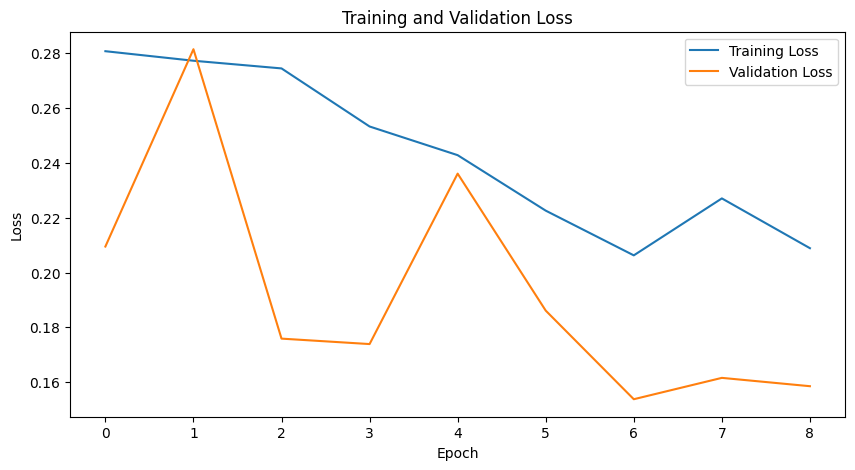

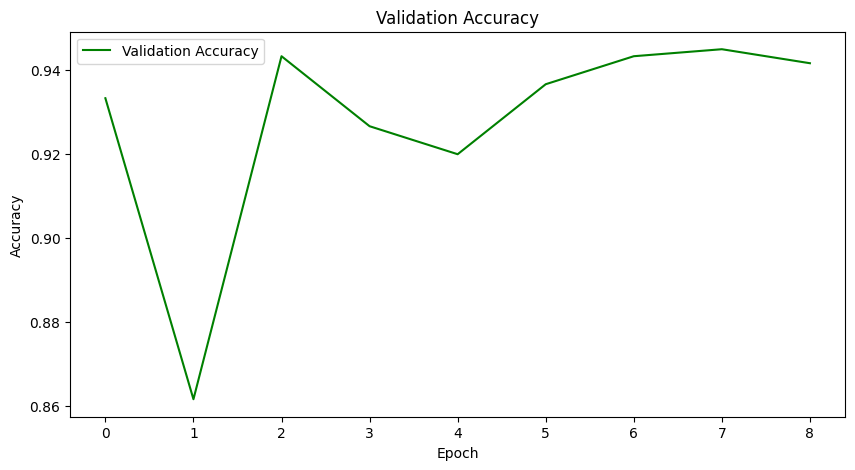

In [18]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(final_train_losses, label='Training Loss')
plt.plot(final_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(final_val_accuracies, label='Validation Accuracy', color='green')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Classification Report

In [19]:
test_labels = []
predictions = []

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())  # Append predictions
        test_labels.extend(labels.cpu().numpy())  # Append test labels

In [20]:
# Convert validation labels and predictions to numpy arrays
y_true = np.array(test_labels)
y_pred = np.array(predictions)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      Normal       0.90      0.95      0.92       200
   Pneumonia       0.98      1.00      0.99       200
Tuberculosis       0.96      0.87      0.91       200

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



## Compute confusion matrix

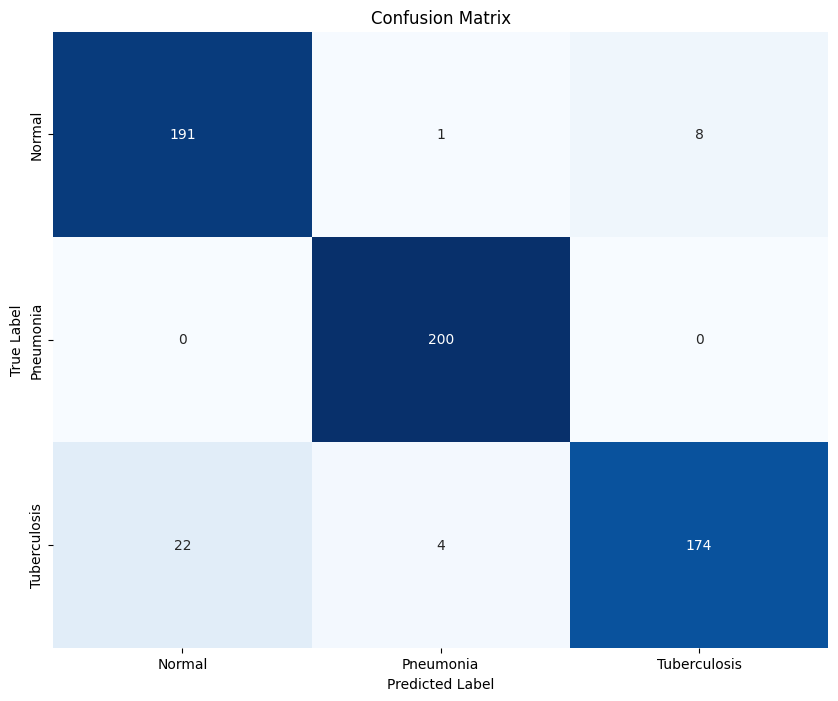

In [21]:
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Save the trained model

In [22]:
# Save the final trained model
torch.save(model.state_dict(), 'final_resnet-18_model.pth')
print("Final model saved successfully!")

Final model saved successfully!
